# Customer Personalization: Beautiful Data Visualization

INTRODUCTION


E-commerce platform becomes reality of disruption that changes the form of pyhisical transactions into online (despite social media), especially in the developing world. Using this platform, entrepreneurs can take advantage of it in business optimization, accelerating business development, access to new market segments, etc. But the question likely to appear is about how to do so?

Knowing how the market works is one of the most important key in planning business model to be built. By supply and demand theory, price is dominant factor that drives quantity sold and assuming another variable are constat. So by using the question of how the market interact to get maximum sales/profit, we can specify it through customer personalization and customer buying behaviour.

CONTEXT


In this notebook, i used Wish summer clothes sales dataset that contain a lot of information we can dig for and defined Units Sold feature as a key metric that measure market perfomance by each product/merchant. Firstly, we build hypothesis variable that affect Units Sold:

1. Price: the amount of money paid for the product, the higher the price the lower the units sold
2. Gap Price: the the difference between the seller's price and the retail price, the higher the gap the lower the units sold
3. Product Rating: the review by number that customer give to the product
4. Merchant Rating: the review by number that customer give to the merchant
5. Product Inventory Variation: the number of types of products available at merchant
6. Ad Boosts: wether the merchant use ad boosts provided by the platform
7. Total Tags: number of tags that seller used

In order to expand our analysis, we did some feature extraction through available feature in the dataset such as:

1. Product Size
2. Product Color
3. Product Gender Information
4. Gap Price
5. 4 and 5 Star Rating Percentage and Count
6. Total Tags Used

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline

In [5]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [6]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

# Data Preprocessing

In [8]:
df.duplicated().any()

True

In [9]:
#there is duplicate input so we will drop it though

df = df.drop_duplicates()

#dropped unnecessary feature

df.drop(['title', 'currency_buyer', 'urgency_text','merchant_info_subtitle', 'merchant_profile_picture', 'product_url', 
'product_picture', 'product_id', 'theme', 'inventory_total', 'crawl_month'], axis = 1, inplace = True)

#here we check null values in the dataset

null_val = pd.DataFrame(df.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:10]

,null_val,percent_
has_urgency_banner,1071,70.0
rating_three_count,43,3.0
rating_four_count,43,3.0
product_color,41,3.0
rating_one_count,43,3.0
rating_two_count,43,3.0
rating_five_count,43,3.0
origin_country,16,1.0
product_variation_size_id,14,1.0
shipping_option_name,0,0.0


In [10]:
#because there are small null values detected, so we just throw it out from the dataset

df.drop(columns = 'has_urgency_banner', axis = 1, inplace = True)
df = df.dropna().reset_index()
df.drop(columns = ['index'], axis = 1, inplace = True)
df.isnull().sum()[:10]

title_orig            0
price                 0
retail_price          0
units_sold            0
uses_ad_boosts        0
rating                0
rating_count          0
rating_five_count     0
rating_four_count     0
rating_three_count    0
dtype: int64

In [12]:
len(df.index)

1427

We have two feature that contain a lot of unique value (Product Size and Product Color). The data is narrowed down in several "Size" and "Color" which have a large proportion in the dataset.

In [13]:
df['product_variation_size_id'] = df['product_variation_size_id'].apply(lambda x: x.upper())
size_list = list(df['product_variation_size_id'])

xxs_err = []
xs_err = []
s_err = []
m_err = []
l_err = []
xl_err = []
xxl_err = []

for i in size_list:
    if (i == 'XXS') or (i == 'XXXS') or (i == 'SIZE XXS') or (i == 'SIZE-XXS') or (i == 'SIZE -XXS'):
        xxs_err.append(i)
    elif (i == 'XS') or (i == 'XS.') or (i == 'SIZE XS') or (i == 'SIZE-XS'):
        xs_err.append(i)
    elif (i == 'S') or (i == 'S.') or (i == 'SUIT-S') or (i == 'SIZE S.') or (i == 'SIZE S') or (i == 'S..') \
    or (i == 'S(BUST 88CM)') or (i == 'S (WAIST58-62CM)') or (i == 'SIZE-S') or (i == 'S DIAMETER 30CM') or (i == '25-S') \
    or (i == 'SIZE/S') or (i == 'PANTS-S') or (i == 'SIZE--S'):
        s_err.append(i)
    elif (i == 'M') or (i == 'M.') or (i == 'SIZE M'):
        m_err.append(i)
    elif (i == 'L') or (i == '32/L') or (i == 'L.') or (i == 'SIZEL'):
        l_err.append(i)
    elif (i == 'XL') or (i == 'X   L'):
        xl_err.append(i)
    elif (i == 'XXL') or (i == 'XXXXXL') or (i == '3XL') or (i == 'SIZE-4XL') or (i == 'XXXL') or (i == '5XL') \
    or (i == '2XL') or (i == '4XL') or (i == 'XXXXL') or (i == '6XL') or (i == 'SIZE-5XL') or (i == 'SIZE4XL') \
    or (i == '04-3XL') or (i == '1 PC - XL'):
        xxl_err.append(i)
        
def size(tipe):
    if tipe in xxs_err:
        return 'XXS'
    elif tipe in xs_err:
        return 'XS'
    elif tipe in s_err:
        return 'S'
    elif tipe in m_err:
        return 'M'
    elif tipe in l_err:
        return 'L'
    elif tipe in xl_err:
        return 'XL'
    elif tipe in xxl_err:
        return 'XXL'
    else:
        return 'OTHER'
    
df['product_variation_size_id'] = df['product_variation_size_id'].apply(size)  

pd.DataFrame(df['product_variation_size_id'].value_counts())

,product_variation_size_id
S,644
XS,331
M,195
XXS,99
L,52
OTHER,49
XXL,39
XL,18


In [14]:
df['product_color'] = df['product_color'].apply(lambda x: x.title())
color_list = list(df['product_color'])

red_un = []
green_un = []
white_un = []
black_un = []
blue_un = []
yellow_un = []
grey_un = []
purple_un = []

for i in color_list:
    if 'Red' in i:
        red_un.append(i)
    elif ('Green' in i) and (i != 'White & Green') and (i != 'Black & Green'):
        green_un.append(i)
    elif (i == 'White') or (i == 'Whiteflora') or (i == 'Offwhite') or (i == 'Whitestripe'):
        white_un.append(i)
    elif (i == 'Black') or (i == 'Coolblack') or (i == 'Offblack'):
        black_un.append(i)
    elif ('Blue' in i) and (i != 'Navyblue & White') and (i != 'Black & Blue') and (i != 'Blue & Pink') \
    and (i != 'Pink & Blue'):
        blue_un.append(i)
    elif (i == 'Yellow') or (i == 'Lightyellow'):
        yellow_un.append(i)
    elif (i == 'Grey') or (i == 'Greysnakeskinprint') or (i == 'Lightgrey') or (i == 'Gray') or (i == 'Lightgray'):
        grey_un.append(i)
    elif 'Purple' in i:
        purple_un.append(i)
        
def color(tipe):
    if tipe in red_un:
        return 'Red'
    elif tipe in green_un:
        return 'Green'
    elif tipe in white_un:
        return 'White'
    elif tipe in black_un:
        return 'Black'
    elif tipe in blue_un:
        return 'Blue'
    elif tipe in yellow_un:
        return 'Yellow'
    elif tipe in grey_un:
        return 'Gray'
    elif tipe in purple_un:
        return 'Purple'
    else:
        return 'Other'
        
df['product_color'] = df['product_color'].apply(color)
pd.DataFrame(df['product_color'].value_counts()).head()

,product_color
Other,402
Black,288
White,231
Red,98
Blue,96


In [15]:
#extracting gender information through product title

df['title_orig'] = df['title_orig'].apply(lambda x: x.title())

women_err = []

def prod_gen(tipe):
    for i in df['title_orig']:
        if ('Man' in i) or ('Men' in i) and (i != 'Woman') :
            women_err.append(i)
    if tipe in women_err:
        return 'Man'
    else:
        return 'Woman'
        
df.insert(1, 'prod_gen', df['title_orig'].apply(prod_gen))

df['prod_gen'].value_counts()

Woman    1342
Man        85
Name: prod_gen, dtype: int64

In [16]:
df.insert(4, 'gap_price', df['retail_price'] - df['price'])


df['units_sold'] = df['units_sold'].apply(lambda x: 100 if x <= 100 else x)

df['gap_price'] = np.abs(round((df['price'] - df['retail_price']) / df['retail_price'] * 100, 1))
df['4and5_count'] = df['rating_five_count'] + df['rating_four_count']
df['percent_4and5'] = round(df['4and5_count'] / df['rating_count'] * 100, 2)
df['total_tags'] = df['tags'].apply(lambda x: len(x.split(',')))


#variable in order
sold_order = [100, 1000, 5000, 10000, 20000, 50000, 100000]
units_sold_order = ['100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '100000+']

#palette visualization
pal_list = ['#66ccff', '#0099cc', '#003399', '#ccffcc', '#b3b3d7', '#d1cab0', '#c3c3e5', '#443266']

# Customer Personalization Breakdown

As we know that the buyers/customers are looking for the items they want to buy. This is where customer personalization came from. Studies have shown that 88% of U.S. marketers reported seeing measurable improvements due to personalization, and 44% of consumers said they would become repeat buyers after a personalized shopping experience with a company. What’s more, businesses saw an average increase of 20% in sales when using personalized experiences.

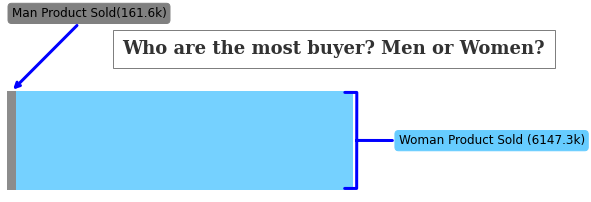

In [22]:
woman = df[df['prod_gen'] == 'Woman'].loc[:, 'units_sold'].value_counts()
man = df[df['prod_gen'] == 'Man'].loc[:, 'units_sold'].value_counts()
gen_sold = pd.Series({'Man_Prod': np.sum(np.array([46,22,9,7,1,0,0]) * sold_order),
                     'Woman_Prod': np.sum(woman.values * sold_order)}).reset_index().set_index('index').T

fig, ax = plt.subplots(1, 1, figsize = (6.5, 2))

#ax.barh(ratio.index, ratio[1.0], color = '#0e4f66', alpha = 0.9, ec = background_color, label = 'Job-Seeker')
ax.barh(gen_sold.index, gen_sold['Man_Prod'], color = 'gray', alpha = 0.9, label = 'Man Product Sold')
ax.barh(gen_sold.index, gen_sold['Woman_Prod'], left = gen_sold['Man_Prod'], color = '#66ccff', alpha = 0.9, 
        label = 'Woman Product Sold')

ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

bbox_args = dict(boxstyle="round", fc="#e2d810", color = '#e2d810')
ax.annotate('Man Product Sold({}k)'.format(gen_sold['Man_Prod'][0] / 1000),
            xy=(gen_sold['Man_Prod'] / 2, 0.4),
            xycoords='data',
            xytext=(gen_sold['Man_Prod'] / 2, 1),
            arrowprops=dict(arrowstyle='->', color='blue', lw = 3), 
            fontsize=12, bbox=dict(boxstyle="round", fc="gray", color = 'gray'))
ax.annotate('Woman Product Sold ({}k)'.format(gen_sold['Woman_Prod'][0] / 1000),
            xy=(gen_sold['Woman_Prod'] + 200000, 0),
            xycoords='data',
            xytext=(gen_sold['Woman_Prod'] + 1000000, -0.03),
            arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=1', lw=3, color='blue'), fontsize=12, 
                            bbox=dict(boxstyle="round", fc="#66ccff", color = '#66ccff'))

ax.text(2107300, 0.7, 'Who are the most buyer? Men or Women?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.show()

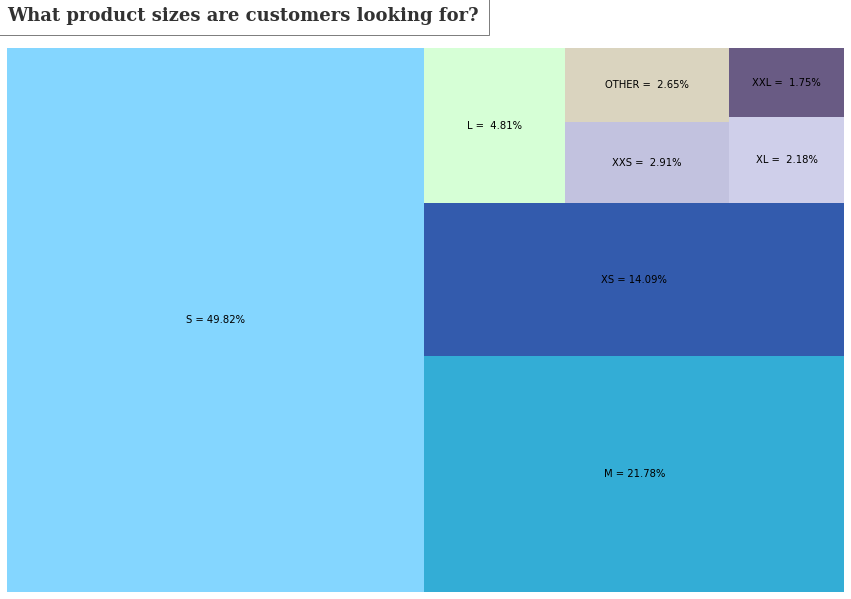

In [23]:
size_map = df.groupby(['units_sold', 'product_variation_size_id']).count().loc[:, 'title_orig'].reset_index()
size_map['size_sold'] = size_map['units_sold'] * size_map['title_orig']
data_size = size_map.groupby('product_variation_size_id')['size_sold'].sum().sort_values(ascending = False).reset_index()

import squarify # pip install squarify (algorithm for treemap)



fig, ax = plt.subplots(1, 1, figsize = (15, 10))

perc = [str('{:5.2f}'.format(i / data_size['size_sold'].sum() * 100)) + "%" for i in data_size['size_sold']]
lbl = [el[0] + " = " + el[1] for el in zip(data_size['product_variation_size_id'], perc)]

squarify.plot(sizes = data_size['size_sold'], label = lbl, alpha = 0.8, ax = ax, 
              color = pal_list)

ax.text(0, 105, 'What product sizes are customers looking for?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.axis('off')
plt.show()

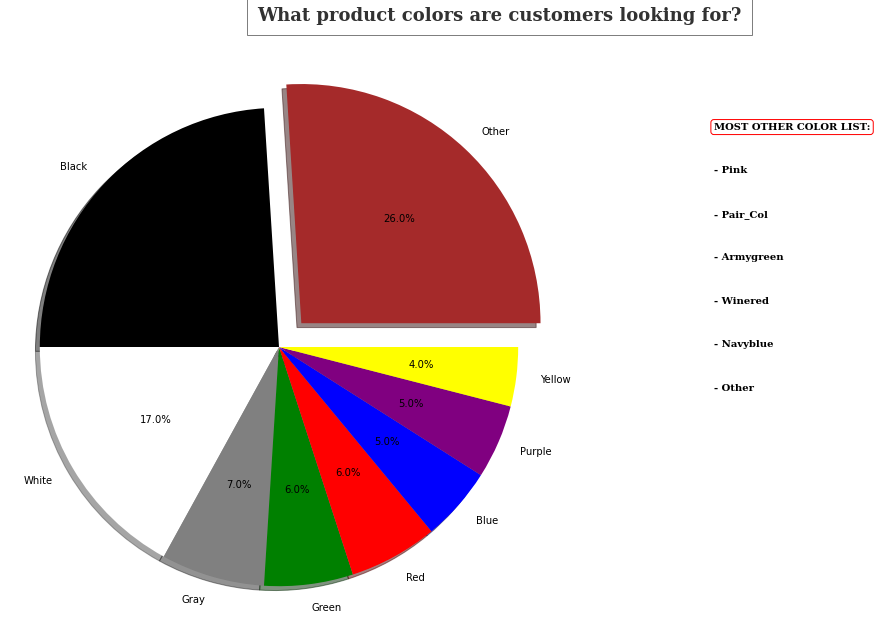

In [24]:
other_col = ['Pink', 'Pair_Col', 'Armygreen', 'Winered', 'Navyblue', 'Other']
size_other_col = [99, 38, 30, 27, 27, 181]

prod_col = df.groupby(['units_sold', 'product_color']).count().loc[:, 'title_orig'].reset_index()
prod_col['color_sold'] = prod_col['units_sold'] * prod_col['title_orig']
data_col = prod_col.groupby('product_color')['color_sold'].sum().sort_values(ascending = False).reset_index()
data_col['percent'] = round(data_col['color_sold'] / data_col['color_sold'].sum(), 2)

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

label = ['Other', 'Black', 'White', 'Gray', 'Green', 'Red', 'Blue', 'Purple', 'Yellow']
size_color = [0.26, 0.24, 0.17, 0.07, 0.06, 0.06, 0.05, 0.05, 0.04]
explode = [0.15, 0, 0, 0, 0, 0, 0, 0, 0]
ax.pie(size_color, labels = label, explode = explode, autopct = '%1.1f%%', 
             counterclock = True, shadow = True, radius = 1.1, 
             colors = [ 'brown', 'black', 'white', 'gray', 'green', 'red', 'blue', 'purple', 'yellow', 'white'])

ax.text(2, 1, 'MOST OTHER COLOR LIST:', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox=dict(boxstyle="round", fc="white", color = 'red'))
y_pos = [0.8, 0.6, 0.4, 0.2, 0, -0.2]
for i, y in zip(other_col, y_pos):
    ax.text(2, y, f'- {i}', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox = dict(boxstyle = "round", color = 'white'))
    
ax.text(-0.1, 1.5, 'What product colors are customers looking for?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.show()

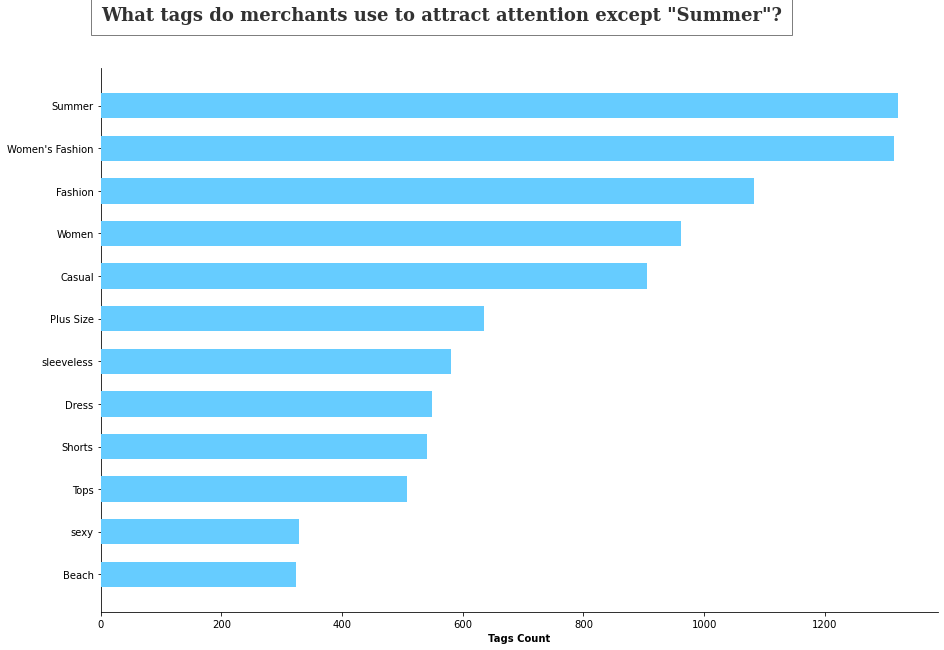

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))

data_tag = pd.read_csv('unique-categories.sorted-by-count.csv')[:12].set_index('keyword')
ax.barh(data_tag.index, width = data_tag['count'], zorder = 3, color = '#66ccff', height = 0.6)
for s in ['right','top']:
    ax.spines[s].set_visible(False)
    
ax.set_xlabel('Tags Count', fontweight = 'bold')
ax.set_ylabel('')
ax.invert_yaxis()

ax.text(0, -2, 'What tags do merchants use to attract attention except "Summer"?', fontsize = 18, fontweight = 'bold', 
        fontfamily = 'serif', color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.show()

# Market Insight: What Factor Affects Unit Sold?

Text(0.5, 0.05, 'zhenxuan (140 countries)')

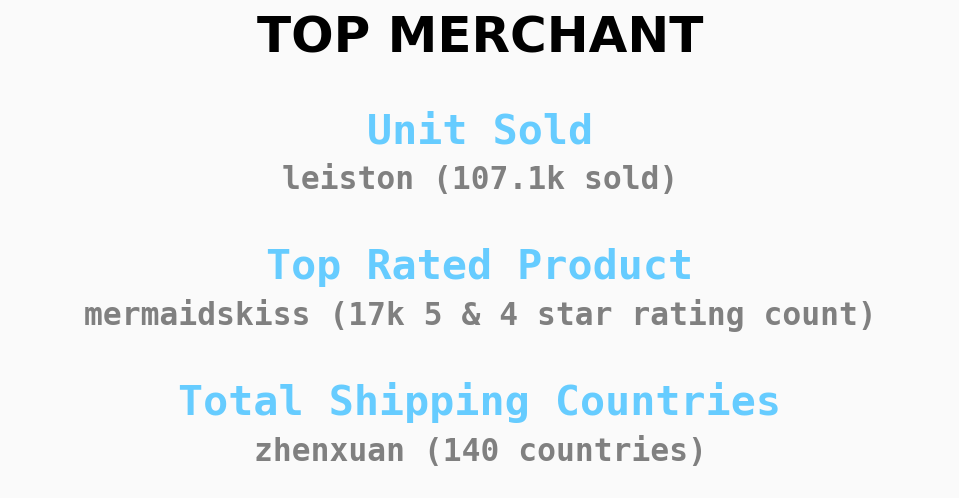

In [27]:
#FUN FACT

#1. 5 highest units sold merchant
#2. 5 highest shipping countries merchant
#3. 5 highest rating five count merchant
high_sold = df.groupby('merchant_name')['units_sold'].sum().sort_values(ascending = False).reset_index()[:5]
high_country = df.groupby('merchant_name')['countries_shipped_to'].max().sort_values(ascending = False).reset_index()[:5]
high_five = df.groupby('merchant_name')['4and5_count'].sum().sort_values(ascending = False).reset_index()[:5]

fig = plt.figure(figsize = (8, 4), dpi = 150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace = 0.2, hspace = 0.4)
ax0 = fig.add_subplot(gs[0, 0])

bg_c = '#fafafa'
fig.patch.set_facecolor(bg_c)
ax0.set_facecolor(bg_c)

for s in ['top','right','left','bottom']:
    ax0.spines[s].set_visible(False)
    
ax0.set_yticklabels('')
ax0.set_xticklabels('')
ax0.tick_params(axis='both',length=0)

ax0.text(0.5, 0.95, "TOP MERCHANT" , color = 'black', fontsize = 24, fontweight = 'bold', 
         fontfamily = 'cursive', ha = 'center')
ax0.text(0.5, 0.75, "Unit Sold", color = '#66ccff', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax0.text(0.5, 0.65, '{} ({}k sold)'.format(high_sold['merchant_name'][0], high_sold['units_sold'][0] / 1000), color = 'gray', 
         fontsize = 15, fontfamily = 'monospace', fontweight = 'bold', ha = 'center')
ax0.text(0.5, 0.45, "Top Rated Product", color = '#66ccff', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace', 
         ha = 'center')
ax0.text(0.5, 0.35, '{} ({}k 5 & 4 star rating count)'.format(high_five['merchant_name'][0], 
        round(high_five['4and5_count'][0].astype(int) / 1000), 2), color = 'gray', fontsize = 15, fontweight = 'bold', 
         fontfamily = 'monospace', ha = 'center')
ax0.text(0.5, 0.15, "Total Shipping Countries", color = '#66ccff', fontsize = 20, fontweight = 'bold', 
         fontfamily = 'monospace', ha = 'center')
ax0.text(0.5, 0.05, '{} ({} countries)'.format(high_country['merchant_name'][0], high_country['countries_shipped_to'][0]), 
         color = 'gray', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')

<ipython-input-29-0f8dda4c9b24>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(units_sold_orderk)


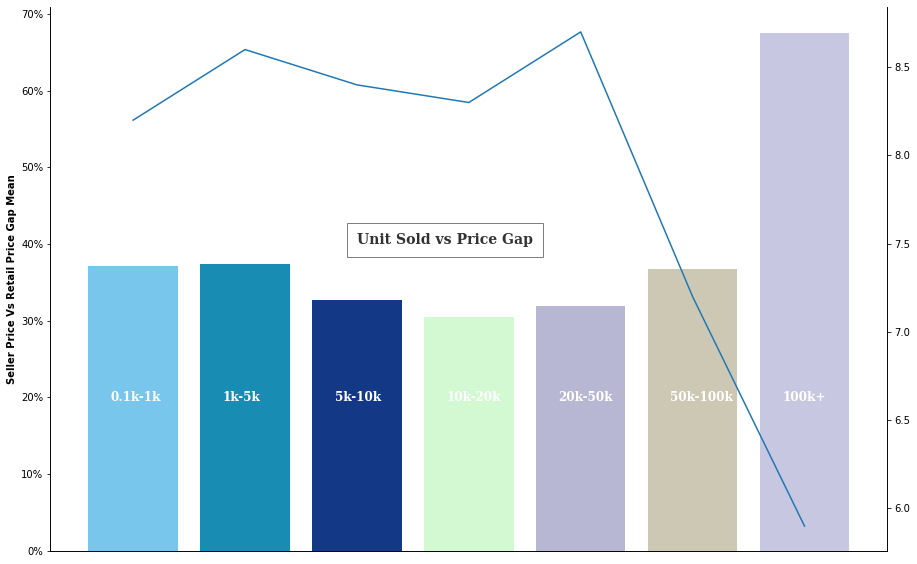

In [29]:
sold_pricegap = round(df.groupby('units_sold')['gap_price'].mean(), 1)
sold_price = round(df.groupby('units_sold')['price'].mean(), 1)

units_sold_orderk = ['0.1k-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']

fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(x = units_sold_orderk, y = sold_pricegap.values, palette = pal_list, ax = ax)

ax2 = ax.twinx()
ax2.plot(units_sold_orderk, sold_price.values)

for s in ['top']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    
ax.set_xticklabels(units_sold_orderk)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Seller Price Vs Retail Price Gap Mean', fontweight = 'bold')
ax.set_xlabel('')
ax.set_xticks([])
ax.text(2, 40, 'Unit Sold vs Price Gap', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = '#323232',
       bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

for ind, val in enumerate(units_sold_orderk):
    ax.annotate(f'{val}', xy = (ind - 0.2, 20), va = 'center',
               fontsize = 12, fontweight = 'bold', fontfamily = 'serif', color = 'white')

<ipython-input-32-37b011188300>:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(f'Merch Rating Mean: {val}', xy = (ind - 0.4, 17000), fontsize = 9, fontweight = 'bold',
<ipython-input-32-37b011188300>:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(f'Prod Rating Mean: {val}', xy = (ind - 0.4, 16100), fontsize = 9, fontweight = 'bold', fontfamily = 'serif',
<ipython-input-32-37b011188300>:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(f'% Product: {val}%', xy = (ind - 0.4, 15100), fontsize = 9,


[Text(0, 0, '100-1000'),
 Text(1, 0, '1000-5000'),
 Text(2, 0, '5000-10000'),
 Text(3, 0, '10000-20000'),
 Text(4, 0, '20000-50000'),
 Text(5, 0, '50000-100000'),
 Text(6, 0, '100000+')]

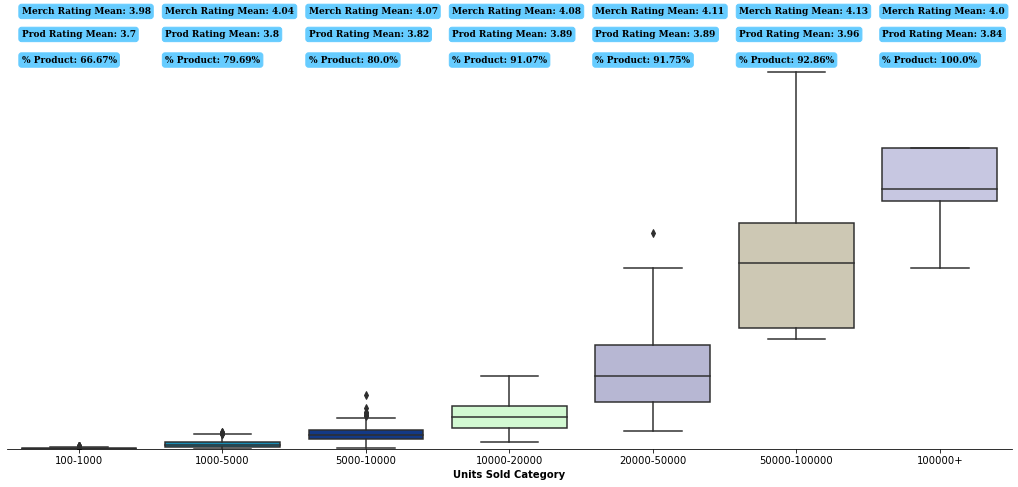

In [32]:
merch_rat_mean = round(df.groupby('units_sold')['merchant_rating'].mean(), 2)
prod_rat_mean = round(df.groupby('units_sold')['rating'].mean(), 2)
coba1 = df[(df['rating'] >= 3.5)].loc[:, ['units_sold']].value_counts()
coba2 = df['units_sold'].value_counts()

data = pd.DataFrame({'units_sold': sold_order, '4+rating_un': list(coba1.values), 'total_un': list(coba2.values)})
data['%got4+_rating'] = round((data['4+rating_un'] / data['total_un']) * 100, 2)

fig, ax = plt.subplots(1, 1, figsize = (18, 8))
sns.boxplot(data = df, x = 'units_sold', y = '4and5_count', ax = ax, palette = pal_list)

for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

for ind, val in enumerate(merch_rat_mean.values):
    ax.annotate(f'Merch Rating Mean: {val}', xy = (ind - 0.4, 17000), fontsize = 9, fontweight = 'bold', 
                fontfamily = 'serif', color = 'black', 
                bbox = dict(boxstyle = "round", color = '#66ccff', facecolor = '#66ccff'))
for ind, val in enumerate(prod_rat_mean.values):
    ax.annotate(f'Prod Rating Mean: {val}', xy = (ind - 0.4, 16100), fontsize = 9, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox = dict(boxstyle = "round", color = '#66ccff', facecolor = '#66ccff'))
for ind, val in enumerate(data['%got4+_rating']):
    ax.annotate(f'% Product: {val}%', xy = (ind - 0.4, 15100), fontsize = 9, 
                fontweight = 'bold', fontfamily = 'serif', color = 'black', 
                bbox = dict(boxstyle = "round", color = '#66ccff', facecolor = '#66ccff'))

ax.set_ylim(0, 17000)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Units Sold Category', fontweight = 'bold')
ax.set_xticklabels(['100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '100000+'])

In [33]:
#Product Variation Inventory VS Units Sold

xx = df[df['product_variation_inventory'] >= 25].loc[:, 'units_sold'].value_counts()
xq = df[df['product_variation_inventory'] < 25].loc[:, 'units_sold'].value_counts()


kk = pd.DataFrame({'Units_Sold': xx.index, '<25_count': xq.values, '>=25_count': xx.values})
kk['%<25'] = round(kk['<25_count'] / (kk['<25_count'] + kk['>=25_count']) * 100, 2)
kk['%>25'] = round(kk['>=25_count'] / (kk['<25_count'] + kk['>=25_count']) * 100, 2)

kk

,Units_Sold,<25_count,>=25_count,%<25,%>25
0,100,257,292,46.81,53.19
1,1000,135,249,35.16,64.84
2,5000,65,145,30.95,69.05
3,10000,35,133,20.83,79.17
4,20000,21,76,21.65,78.35
5,50000,5,9,35.71,64.29
6,100000,1,4,20.00,80.00


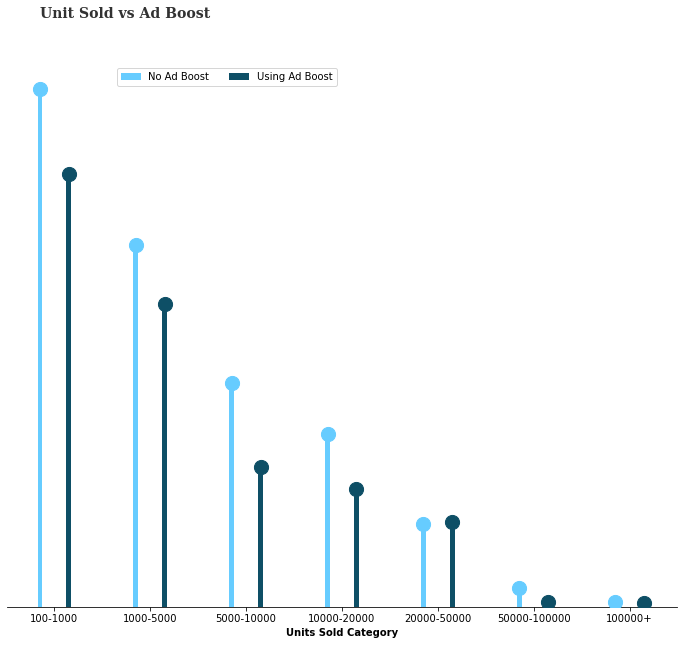

In [34]:
no_ad_boost = df[df['uses_ad_boosts'] == 0]
ad_boost = df[df['uses_ad_boosts'] == 1]


no_ad_sold = pd.DataFrame(no_ad_boost.groupby('units_sold')['uses_ad_boosts'].count())
ad_sold = pd.DataFrame(ad_boost.groupby('units_sold')['uses_ad_boosts'].sum())

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

ax.bar(np.arange(len(no_ad_sold.index)), height = no_ad_sold['uses_ad_boosts'], zorder = 3, color = '#66ccff', width = 0.05,
      label = 'No_ad_Boost')
ax.scatter(np.arange(len(no_ad_sold.index)), no_ad_sold['uses_ad_boosts'], zorder = 3, s = 200, color = '#66ccff')
ax.bar(np.arange(len(ad_sold.index))+0.3, height=ad_sold["uses_ad_boosts"], zorder=3, color="#0e4f66", width=0.05,
      label = 'Using Ad Boost')
ax.scatter(np.arange(len(ad_sold.index))+0.3, ad_sold["uses_ad_boosts"], zorder=3,s=200, color="#0e4f66")

ax.text(0, 340, 'Unit Sold vs Ad Boost', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = '#323232')
ax.set_xticks(np.arange(len(no_ad_sold.index)) + 0.3 / 2)
ax.set_xticklabels(['100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '100000+'])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Units Sold Category', fontweight = 'bold')

legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No Ad Boost', 'Using Ad Boost'], ncol = 2, bbox_to_anchor = (0.5, 1))

for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

<Figure size 432x288 with 0 Axes>

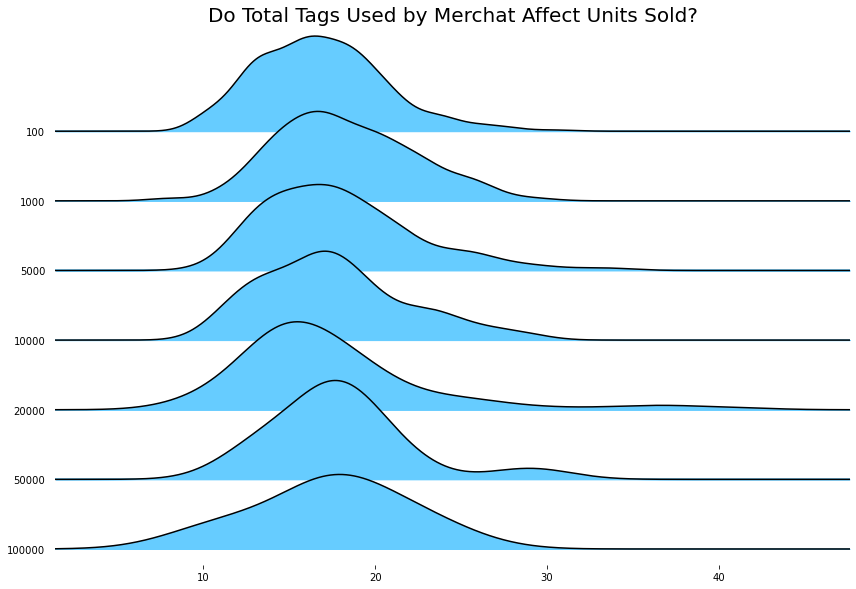

In [35]:
from joypy import joyplot

plt.figure()

joyplot(
    data=df[['units_sold', 'total_tags']], 
    by='units_sold',
    color = '#66ccff',
    figsize=(12, 8)
)
plt.title('Do Total Tags Used by Merchat Affect Units Sold?', fontsize=20)
plt.show()

Total tags by product display that merchant used do not appear to have a significant effect on units sold. This shows that most customers find their products through product title searches instead of searching through tags.

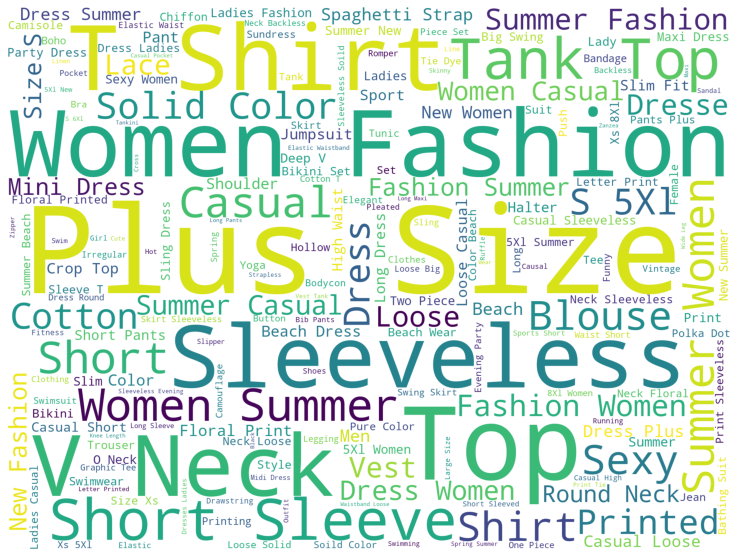

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = ' '.join(df['title_orig'])

plt.figure(figsize = (15, 10))

wordcloud2 = WordCloud(width = 2000, height = 1500, 
            background_color ='white').generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# Highlight

- Customer personalization makes us understand who will buy our products, what kind of products and how we tell them about our products. In this dataset, we know that more than 90%, product sold by merchant are women fashion. Most of them are looking for black, white, gray etc and looking for S, M, XS, etc product size.
- Because customers are price sensitive, merchants are suggested to analyze their pricing strategy by considering costs, market segmentation, competitors, product quality before competing in the market.
- Merchants are encouraged to always keep their rating high by having good relations with customers, convenient service, maintaining product quality etc.
- The use of ad boost is still not maximized by merchants in accelerating their sales. The use of ad boost generally depends on the selection of keywords that are most used by customers in searching for products. Choosing the right words can increase product/merchant engagement as well as increase their sales.